Мы участвуем в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, нужно провести разведывательный анализ данных и составить отчёт по его результатам. 

### Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import  jupyter_contrib_nbextensions

In [2]:
import autopep8

In [3]:
# %pip install jupyter_contrib_nbextensions

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations
from scipy.stats import  ttest_ind

import functions_module_2 as fm2          # подключаем модуль с написаными функциями для работы с датасетом

import warnings; warnings.simplefilter('ignore')

In [5]:
math = pd.read_csv('stud_math.xls')

In [6]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [7]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [8]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Видно, что многие столбцы имеют пропущенные данные. Посчитаем, сколько же в каждом столбце таких значений.

In [9]:
fm2.null_count(math).sort_values(by='null_count', ascending=False).T

,Pstatus,paid,famsup,Fjob,internet,romantic,guardian,traveltime,famrel,famsize,...,freetime,schoolsup,goout,studytime,"studytime, granular",score,Medu,sex,age,school
null_count,45.000000,40.000000,39.000000,36.000000,34.000000,31.000000,31.000000,28.000000,27.000000,27.000000,...,11.00000,9.000000,8.000000,7.000000,7.000000,6.000000,3.000000,0.0,0.0,0.0
null_count_percent,11.392405,10.126582,9.873418,9.113924,8.607595,7.848101,7.848101,7.088608,6.835443,6.835443,...,2.78481,2.278481,2.025316,1.772152,1.772152,1.518987,0.759494,0.0,0.0,0.0


Оказывется, что пропущеные значения составляют менее чем *12%* от значений каждом столбце.

Столбцом с максимальным количеством пропущенных значений оказался **Pstatus**, который отвечает за статус совместного жилья родителей. Возможно, это связано с неопределенными отношениями между родителями или может говорить о каком-то переходным периоде в их отношениях, когда ребенок не понимает ситуацию в семье и не может определиться.

Среди таких столбцов как **sex**, **age**, **school** пропущеных значений обнаружено не было, что, возможно, может сказать нам о том, что опрошенные хорошо помнят школу, в которой учились,и не, вероятно, не имеют больших вопросов в гендерном самоопределении, а возможно, опрос проходил в достаточно консервативном обществе, где подобные вопросы не обсуждаются.

### Описание датасета
Посмотрим на переменные, которые содержит датасет:

In [10]:
math_description = fm2.description()
math_description

,description
school,"аббревиатура школы, в которой учится ученик"
sex,"пол ученика ('F' - женский, 'M' - мужской)"
age,возраст ученика (от 15 до 22)
address,"тип адреса ученика ('U' - городской, 'R' - за ..."
famsize,"размер семьи('LE3' <= 3, 'GT3' >3)"
Pstatus,статус совместного жилья родителей ('T' - живу...
Medu,"образование матери (0 - нет, 1 - 4 класса, 2 -..."
Fedu,"образование отца (0 - нет, 1 - 4 класса, 2 - 5..."
Mjob,"работа матери ('teacher' - учитель, 'health' -..."
Fjob,"работа отца ('teacher' - учитель, 'health' - с..."


### Корреляционный анализ

Выясним, какие столбцы коррелируют. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

In [11]:
quantative_columns = math.select_dtypes(exclude='object').columns
len(quantative_columns)

13

Так как построение pairplot для всех 13 столбцов одновременно получается достаточно громоздким и мало информативным - разобьем его на несколько кусков.

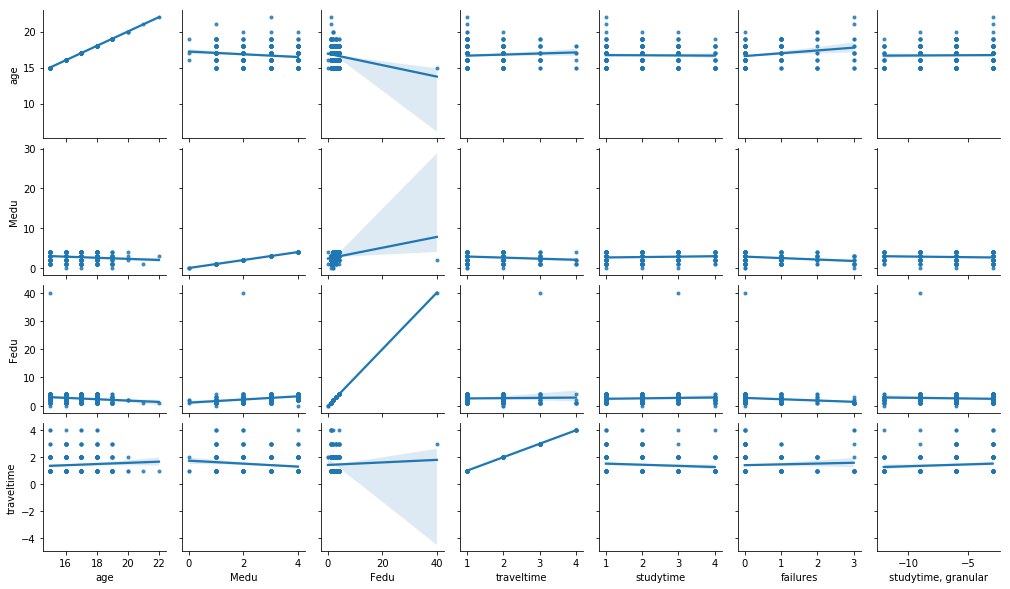

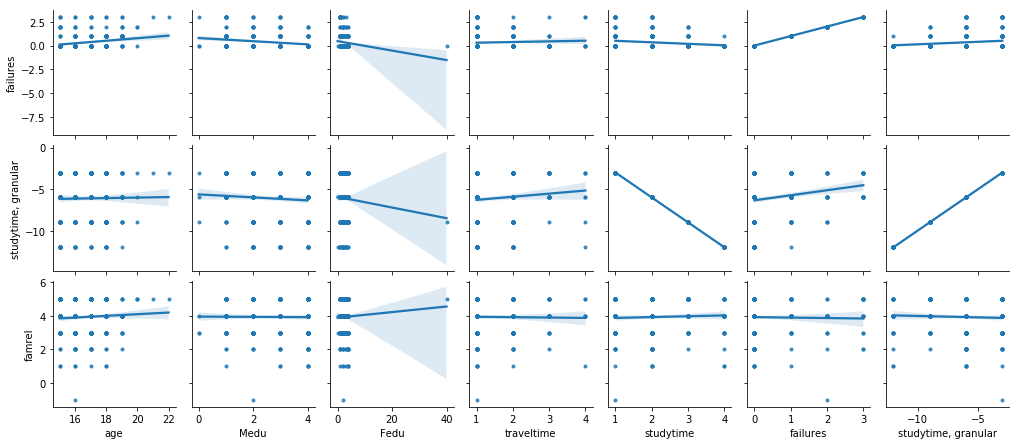

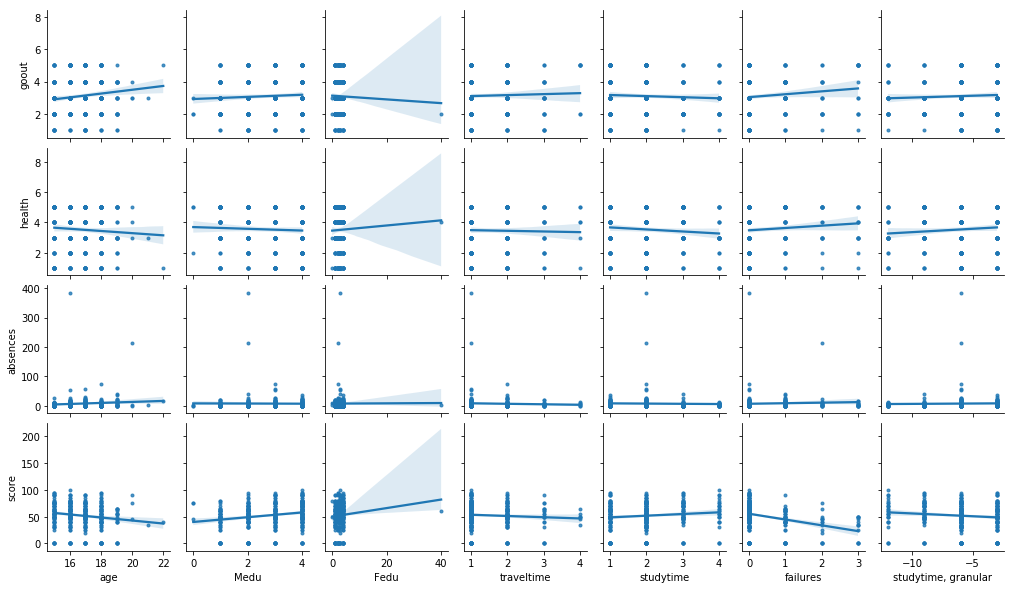

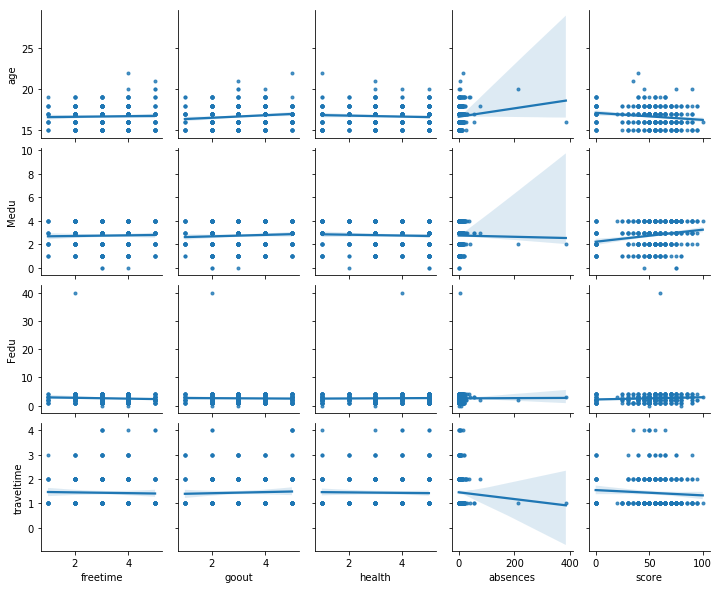

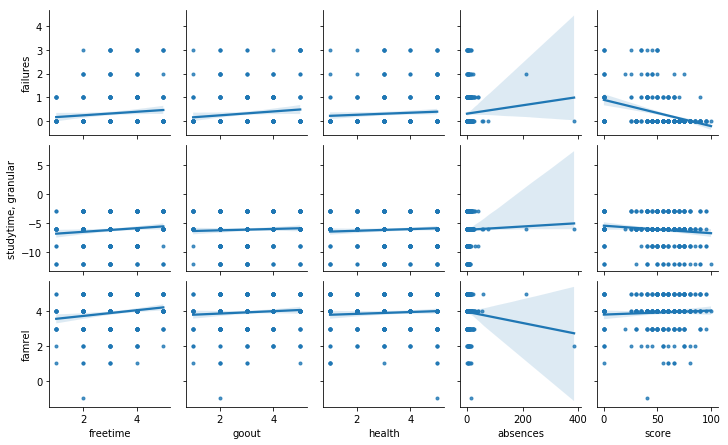

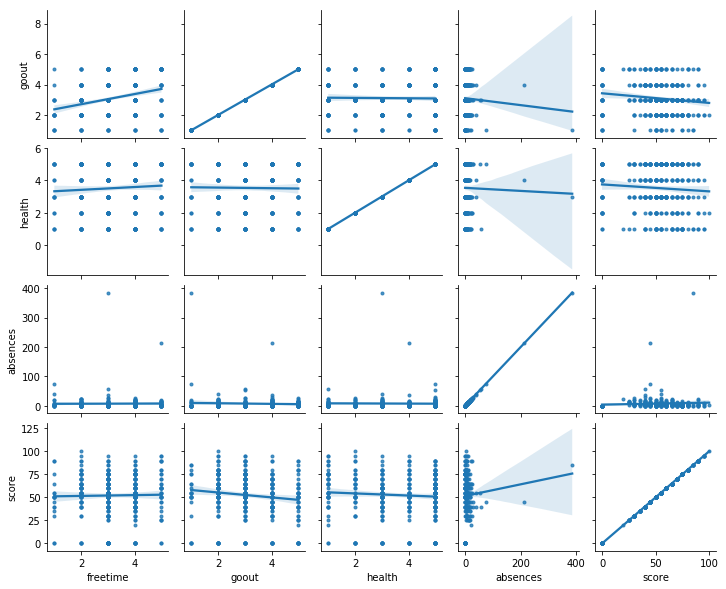

In [12]:
x_range = [(0,7),(8,13)]
y_range = [(0,4),(5,8),(9,13)]
for x in  x_range:
    for y in y_range:
        fm2.pairplot(math, x[0], x[1], y[0], y[1])

Из графиков видно, что кроме тех случаев, когда по обеим осям отложены значенияя одного и того же столбца, на прямую очень хорошо ложатся точки столбцов **studytime** и **studytime, granular**

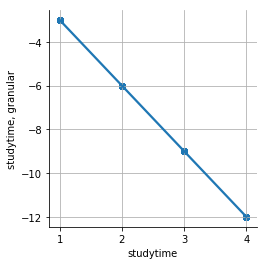

In [13]:
sns.pairplot(math, x_vars='studytime', y_vars='studytime, granular', kind = 'reg', height=3.5)
plt.grid(True);

Видно, что зависимость линейная с отрицательным коэффициентом. 

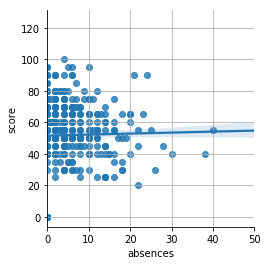

In [14]:
sns.pairplot(math, x_vars='absences',y_vars='score', kind = 'reg', height=3.5)
plt.xlim(0,50)
plt.grid(True);

 Между набранными баллыми и количеством пропущенных занятий зависимости не выявлено.
 
 Рассмотрим дополнительно матрицу корреляции:

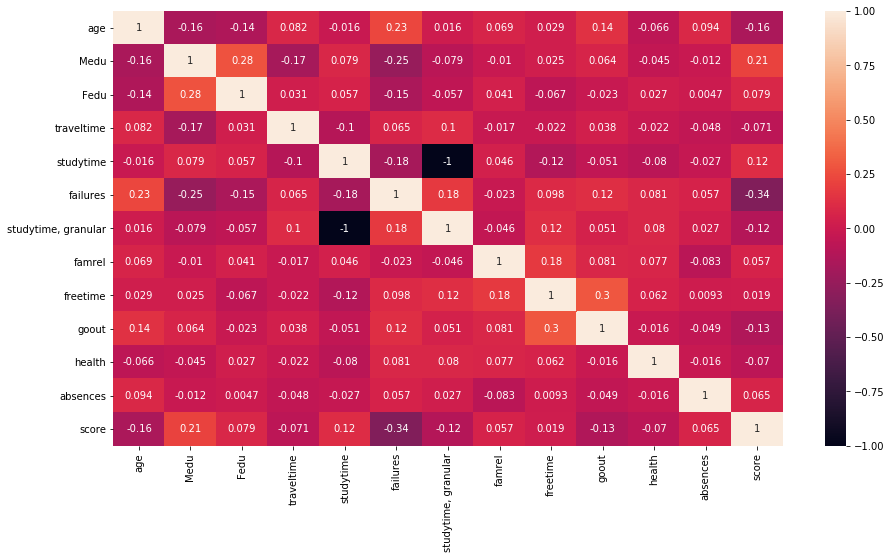

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(math.corr(),annot=True);

Матрица корреляции нам только подтверждает,  что **studytime** и **studytime, granular** зависимы друг от друга, а значит один из них можно будет удалить без потери значащей для поставленной задачи информации.  Пусть это будет **studytime, granular**, так как он все равно в описании отсутствует.

Из оставшийхся значений корреляции самое большое по модулю -0.34 между **score** и **failures**, хотя эта корреляция и слабая, рассмотрим их отдельно:

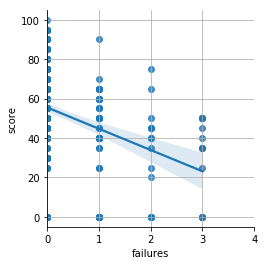

In [16]:
sns.pairplot(math, x_vars='failures',y_vars='score', kind = 'reg', height=3.5)
plt.xlim(0,4)
plt.grid(True);

Действительно, явной зависимости между количеством неудач и набранными балами не наблюдается: как при отсутствии неудач, так и при их присутствии балы за экзамен могут быть как очень низкие, так и высокие, но все же наблюдается такая тенденция: максимальный балл зависит от количества неудач:

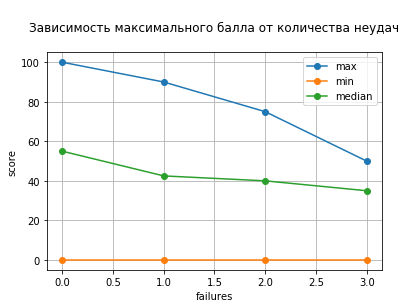

In [17]:
math_gr_failures = math.groupby('failures')

plt.plot(list(math_gr_failures.max().score.index), math_gr_failures.max().score, '-o',label='max')
plt.plot(list(math_gr_failures.min().score.index), math_gr_failures.min().score, '-o', label='min')
plt.plot(list(math_gr_failures.median().score.index), math_gr_failures.median().score, '-o', label='median')

plt.title('\nЗависимость максимального балла от количества неудач\n')
plt.xlabel('failures')
plt.ylabel('score')
plt.legend()
plt.grid(True);

Из приведенного графика можно сделать следующий вывод: получить низкий или относительно высокий балл можно при любом раскладе, но чем больше неудач вы терпите, тем сложнее вам будет получить наивысший балл.

In [18]:
quantative_columns = math.select_dtypes(exclude='object').columns

In [19]:
pd.DataFrame(math_description.loc[quantative_columns[0:], 'description'])

,description
age,возраст ученика (от 15 до 22)
Medu,"образование матери (0 - нет, 1 - 4 класса, 2 -..."
Fedu,"образование отца (0 - нет, 1 - 4 класса, 2 - 5..."
traveltime,"время в пути до школы (1 - <15 мин., 2 - 15-30..."
studytime,время на учёбу помимо школы в неделю (1 - <2 ч...
failures,"количество внеучебных неудач (n, если 1<=n<=3,..."
"studytime, granular",NaN
famrel,семейные отношения (от 1 - очень плохо до 5 - ...
freetime,свободное время после школы (от 1 - очень мало...
goout,проведение времени с друзьями (от 1 - очень ма...


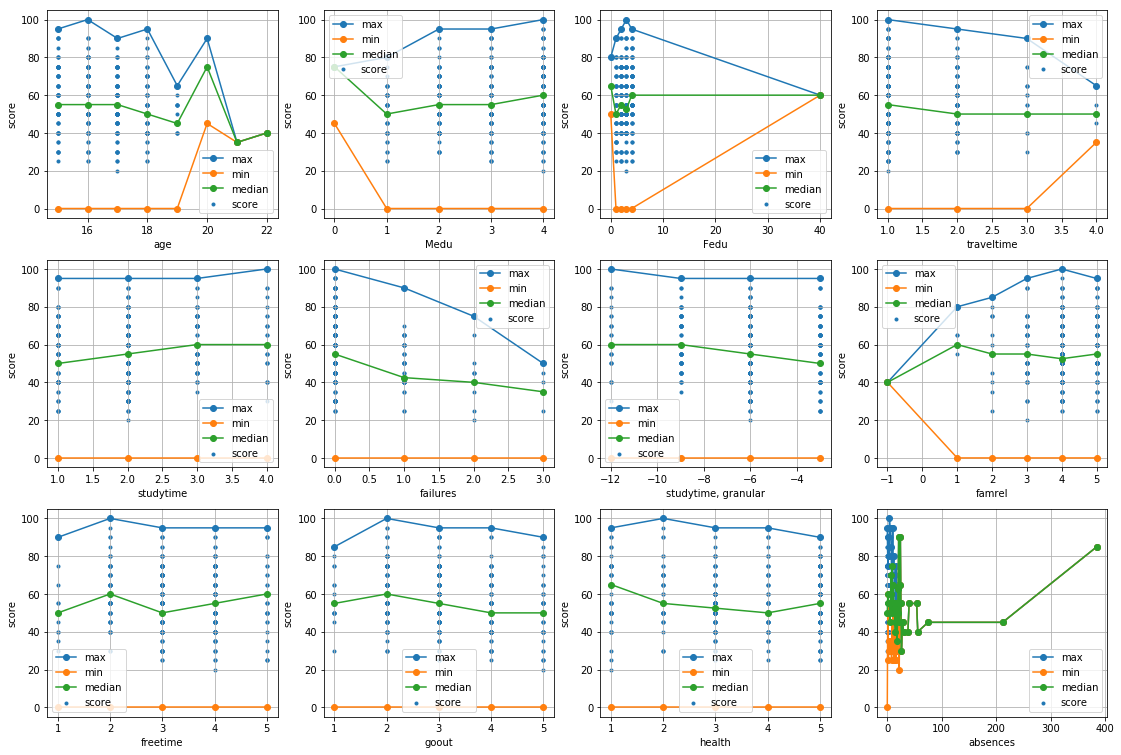

In [20]:
fm2.scatter_statistics(math)

- age

Какой-то явной зависимости балла от возраста не  замечено, но видно, что чем выше возраст, тем меньше группа человек этого возраста. Медианные значения заметных отличий не имеют.

- Medu

Кажется, что чем выше ступень образования матерей опрошенных, тем выше их максимальный балл и медианное значение на тесте. Особенно эта тенденция ставится заметной, если не учитывать значения в нуле, так данных достаточно мало.

- Fedu

Имеет явный выброс - следует рассмотреть отдельно.

- traveltime

Пожалуй, можно заключить, что время пути до школы не сильно влияет да итоговый балл.

- studytime

Видно, что длительность  внешкольного обучения дает небольшой прирост в итоговый балл.

- failures

Как было отмечено ранее, количество неудач негативно сказывается на получении высокого бала на экзамене.

- studytime, granular

Коррелирует со столбцом **studytime**, поэтому вообще может быть удален.

- famrel

Кажется, что чем лучше семейные отношения, тем больше у обучающихся шансов получить высокий балл на экзамене.

- freetime 

Сильного влияния количества свободного времени у учеников на итоговый балл заметить не удалось.

- goout

Похоже, что обе крайности в данном случае негатично влияют на итоговый балл.

- health

Кажется, что состояние здоровья не сильно влияет на возможность получения высокого балла, однако если судить по медианным значениям, то зависимость кажется обратной.

- absences

Не дает сколь-нибудь значимой информации.

### Анализ выбросов в столбцах с количественными значениями

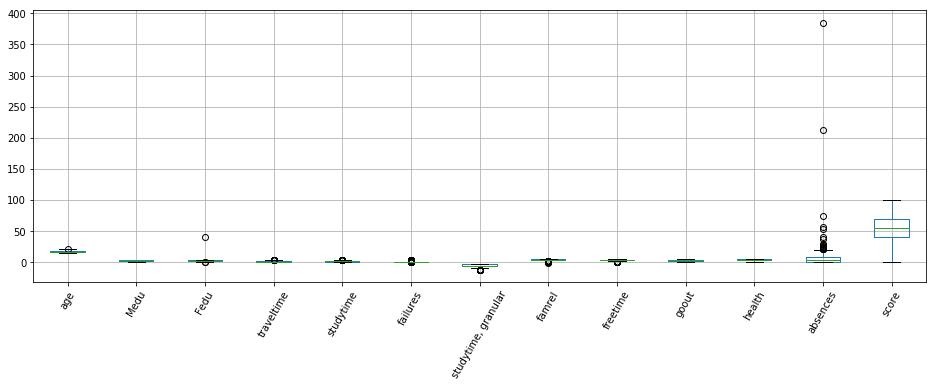

In [21]:
plt.figure(figsize=(16,5))
math.boxplot()
plt.xticks(rotation=60);

Видно, что выбросы имеются в столбцах: 
- age, 
- Fedu, 
- traveltime, 
- studytime, 
- failures, 
- studytime(granular), 
- famrel, 
- freetime, 
- absences

И не имеются в
- Medu
- goout
- health
- score

### Числовыми столбцами являются:

In [22]:
numerical = math.select_dtypes(exclude='object').columns

### Исследуем каждые столбец отдельно:


*********************************************************************

*********************************************************************
age -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце age


,16,17,18,15,19,20,22,21
counts,104,98,82,82,24,3,1,1



Рассмотрим статистики в столбце age


,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0


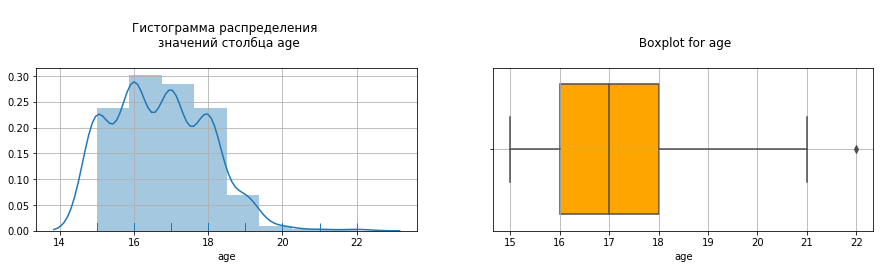

In [23]:
fm2.investigate_num_col(math,numerical[0])

Возраст опрошеных имеет примерно нормальное распределение с пиком где-то на 16 годах.
Имеются выбросы, но их можно обосновать физическими: по какой-то причине человек вынужден сдавать тест в 22 года.


*********************************************************************

*********************************************************************
Medu -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце Medu


,4.0,2.0,3.0,1.0,0.0
counts,131,102,97,59,3



Рассмотрим статистики в столбце Medu


,count,mean,std,min,25%,50%,75%,max
Medu,392.0,2.75,1.098127,0.0,2.0,3.0,4.0,4.0


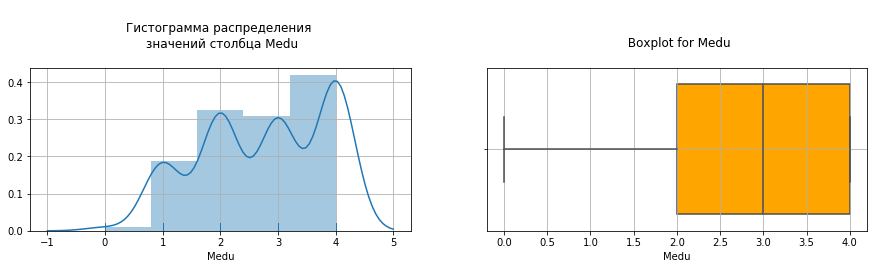

In [24]:
fm2.investigate_num_col(math,numerical[1])

В столбце Medu выбросов не обнаружено. На основе данных можно сделать вывод, что у большинства опрошенных матери имеют образование не ниже среднего специального или 11 классов.


*********************************************************************

*********************************************************************
Fedu -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце Fedu


,2.0,3.0,4.0,1.0,0.0,40.0
counts,106,96,88,78,2,1



Рассмотрим статистики в столбце Fedu


,count,mean,std,min,25%,50%,75%,max
Fedu,371.0,2.614555,2.228732,0.0,2.0,2.0,3.0,40.0


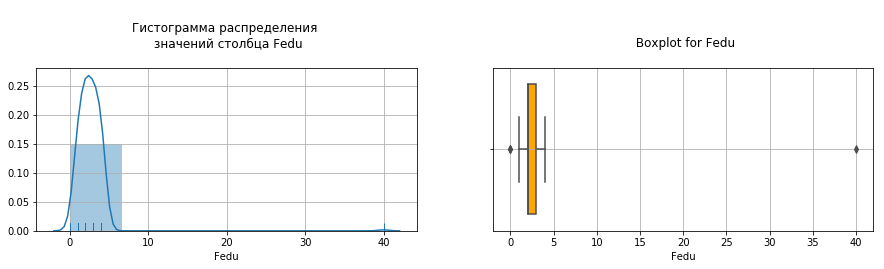

In [25]:
fm2.investigate_num_col(math,numerical[2])

В столбце Fedu  имеются выбросы, но подзрительные только те, что лежат в точке 40, так как диапазон ответов должне ограничиваться значениями из набора {0,1,2,3,4}. Этот выброс следует удалить из данных.


*********************************************************************

*********************************************************************
traveltime -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце traveltime


,1.0,2.0,3.0,4.0
counts,242,96,22,7



Рассмотрим статистики в столбце traveltime


,count,mean,std,min,25%,50%,75%,max
traveltime,367.0,1.438692,0.694181,1.0,1.0,1.0,2.0,4.0


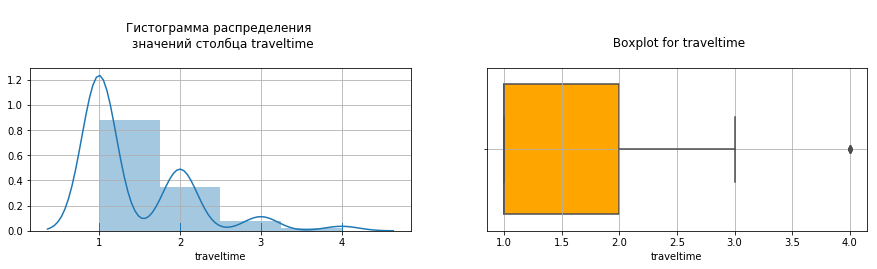

In [26]:
fm2.investigate_num_col(math,numerical[3])

В столбце traveltime выбросы есть, но удалять их, наверное, не стоит. Подавляющее большинство опрошенных проводит менее 30 мин в пути до школы.


*********************************************************************

*********************************************************************
studytime -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце studytime


,2.0,1.0,3.0,4.0
counts,194,103,64,27



Рассмотрим статистики в столбце studytime


,count,mean,std,min,25%,50%,75%,max
studytime,388.0,2.03866,0.842078,1.0,1.0,2.0,2.0,4.0


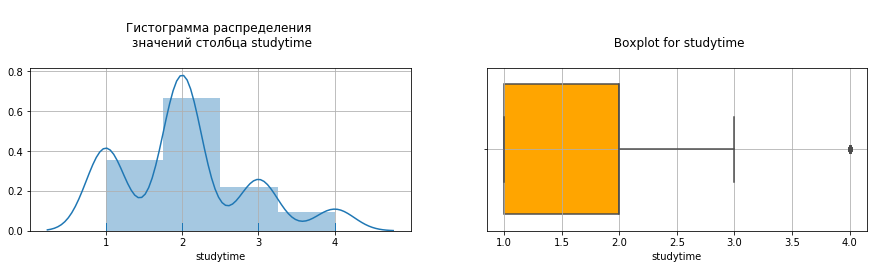

In [27]:
fm2.investigate_num_col(math,numerical[4])


*********************************************************************

*********************************************************************
failures -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце failures


,0.0,1.0,2.0,3.0
counts,293,49,16,15



Рассмотрим статистики в столбце failures


,count,mean,std,min,25%,50%,75%,max
failures,373.0,0.337802,0.743135,0.0,0.0,0.0,0.0,3.0


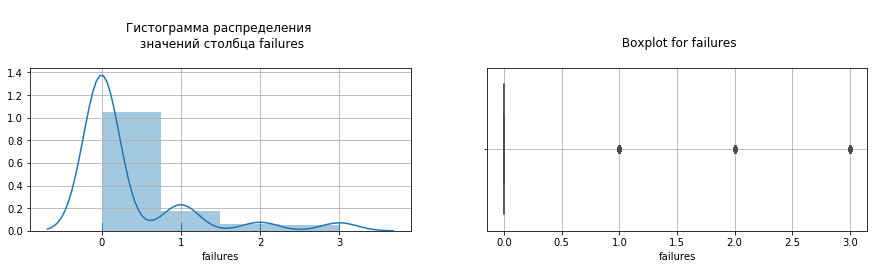

In [28]:
fm2.investigate_num_col(math,numerical[5])

Большиство опрошенных не сталкивались с неудачами, по крайней мере по их мнению, а, взможно, просто более успешно их преодолевали.


*********************************************************************

*********************************************************************
studytime, granular -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце studytime, granular


,-6.0,-3.0,-9.0,-12.0
counts,194,103,64,27



Рассмотрим статистики в столбце studytime, granular


,count,mean,std,min,25%,50%,75%,max
"studytime, granular",388.0,-6.115979,2.526235,-12.0,-6.0,-6.0,-3.0,-3.0


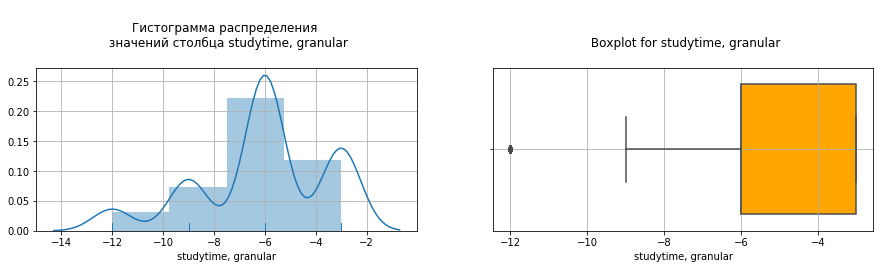

In [29]:
fm2.investigate_num_col(math,numerical[6])

Столбец выше, вообще стоит удалить.


*********************************************************************

*********************************************************************
famrel -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце famrel


,4.0,5.0,3.0,2.0,1.0,-1.0
counts,182,99,62,17,7,1



Рассмотрим статистики в столбце famrel


,count,mean,std,min,25%,50%,75%,max
famrel,368.0,3.9375,0.927277,-1.0,4.0,4.0,5.0,5.0


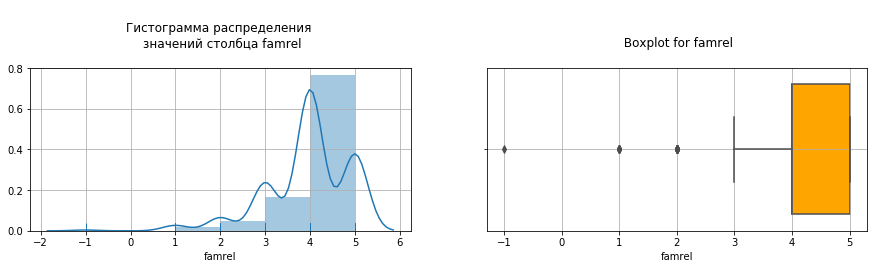

In [30]:
fm2.investigate_num_col(math,numerical[7])

В столбце famrel, во-первых имеется аномальное значение {-1}, которое необходимо будет удалить из данных; во-вторых, подавляющее большинство опрошенных считает отношения в своей семье хорошими или очень хорошими.


*********************************************************************

*********************************************************************
freetime -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце freetime


,3.0,4.0,2.0,5.0,1.0
counts,153,112,63,38,18



Рассмотрим статистики в столбце freetime


,count,mean,std,min,25%,50%,75%,max
freetime,384.0,3.231771,0.99394,1.0,3.0,3.0,4.0,5.0


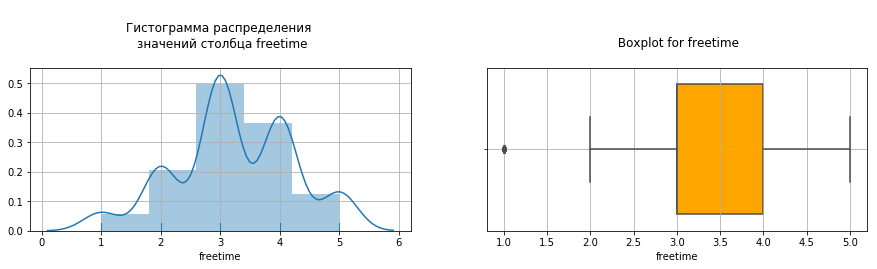

In [31]:
fm2.investigate_num_col(math,numerical[8])

Большинство опрошеных считает, что имеют много или очень мнго свободного времени.


*********************************************************************

*********************************************************************
goout -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце goout


,3.0,2.0,4.0,5.0,1.0
counts,127,101,84,52,23



Рассмотрим статистики в столбце goout


,count,mean,std,min,25%,50%,75%,max
goout,387.0,3.105943,1.115896,1.0,2.0,3.0,4.0,5.0


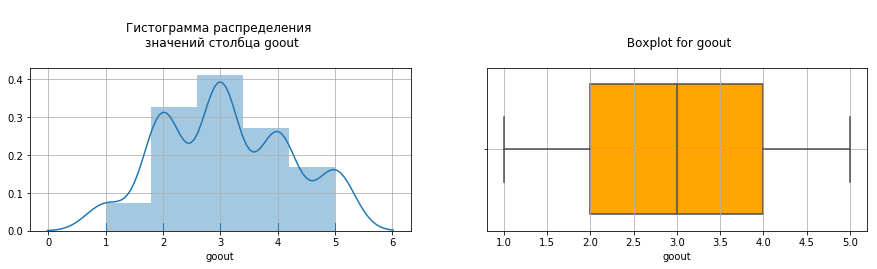

In [32]:
fm2.investigate_num_col(math,numerical[9])

При этом с количество времени, проводимое с друзьями опрошенные указывают не столь оптимистично: от мало до много со средним где-то посредине.


*********************************************************************

*********************************************************************
health -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце health


,5.0,3.0,4.0,1.0,2.0
counts,138,89,63,47,43



Рассмотрим статистики в столбце health


,count,mean,std,min,25%,50%,75%,max
health,380.0,3.531579,1.396019,1.0,3.0,4.0,5.0,5.0


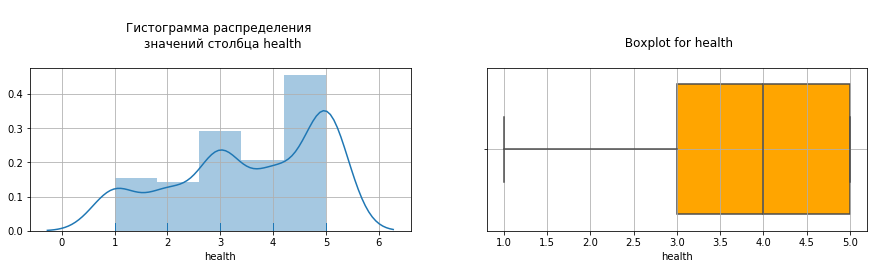

In [33]:
fm2.investigate_num_col(math,numerical[10])

Многие опрошенные оценивают свое здоровье от нормального до очень хорошего со среднем в - хорошее.


*********************************************************************

*********************************************************************
absences -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце absences


,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,3.0,16.0,...,212.0,21.0,75.0,30.0,19.0,38.0,40.0,23.0,17.0,28.0
counts,111,60,53,31,21,17,12,12,8,7,...,1,1,1,1,1,1,1,1,1,1



Рассмотрим статистики в столбце absences


,count,mean,std,min,25%,50%,75%,max
absences,383.0,7.279373,23.465197,0.0,0.0,4.0,8.0,385.0


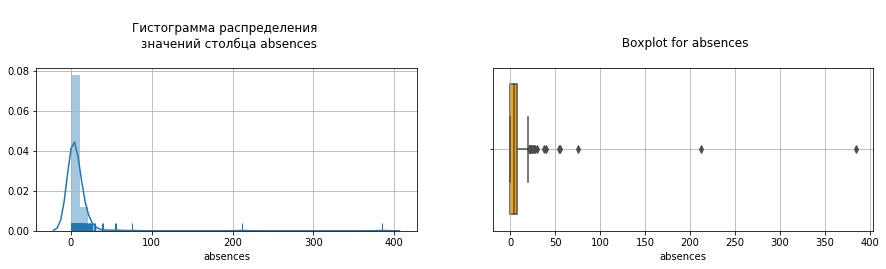

In [34]:
fm2.investigate_num_col(math,numerical[11])

Видно, что есть выбросы: то есть есть несколько человек с очень большим количеством пропусков (~200, ~400), возможно по состоянию здоровья, а возможно - нет. Есть смысл посмотреть на связь этих признаков и еще итоговый балл.


*********************************************************************

*********************************************************************
score -  no description

*********************************************************************

Посчитаем количество каждого из значений в столбце score


,50.0,55.0,0.0,75.0,65.0,40.0,60.0,70.0,45.0,80.0,30.0,90.0,35.0,25.0,85.0,95.0,100.0,20.0
counts,54,46,37,33,31,31,31,27,27,16,15,12,9,7,6,5,1,1



Рассмотрим статистики в столбце score


,count,mean,std,min,25%,50%,75%,max
score,389.0,52.262211,22.919022,0.0,40.0,55.0,70.0,100.0


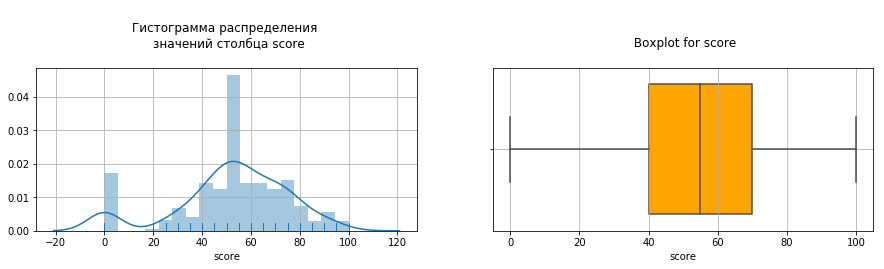

In [35]:
fm2.investigate_num_col(math,numerical[12])

Видно, что основная часть опрошенных получила за экзамен от 40 до 70 баллов, со средним в 52. В то же время, имеются как те, кто сдал экзамен на высший балл, так и те, кто на низший. 

**!!!** Стоит дополнительно рассмотреть какие факторы влияли на получение очень высоких и очень низких баллов.

### Анализ качественных переменных

In [36]:
math.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [37]:
fm2.description().loc['paid','description']

'дополнительные платные занятия по математике (yes или no)'

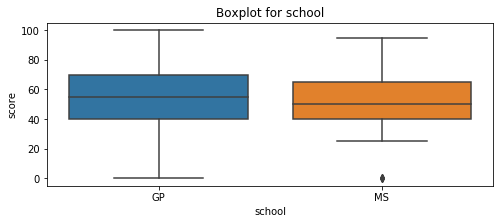

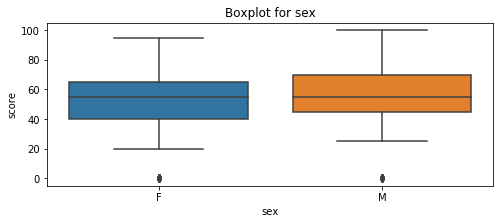

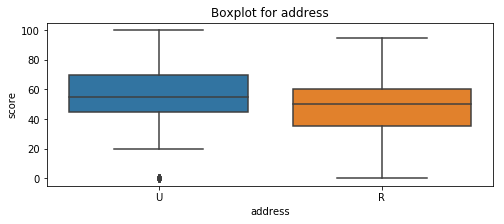

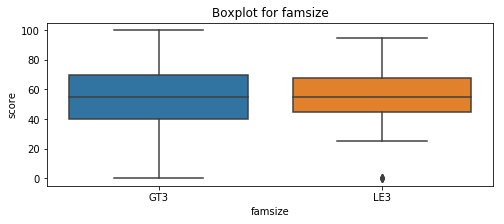

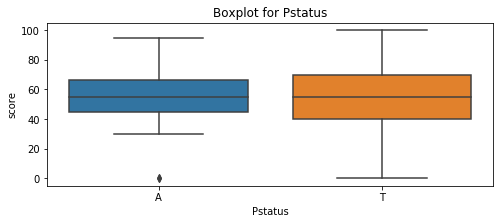

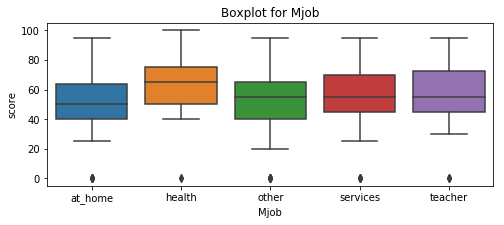

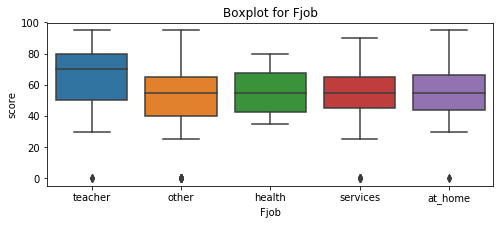

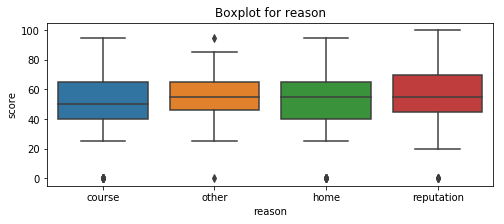

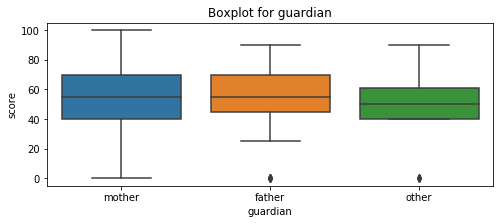

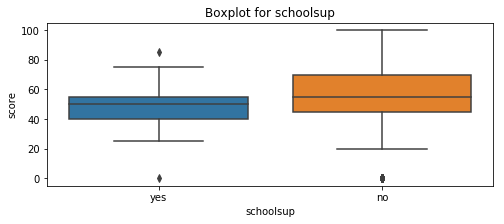

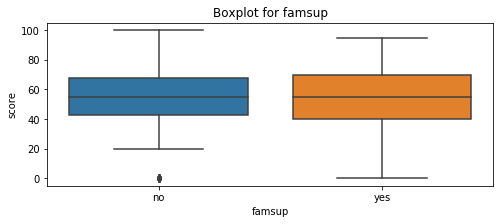

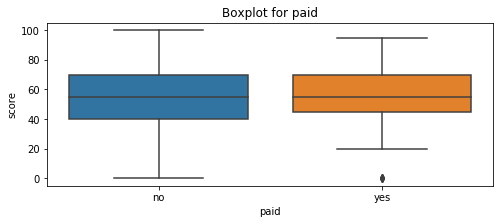

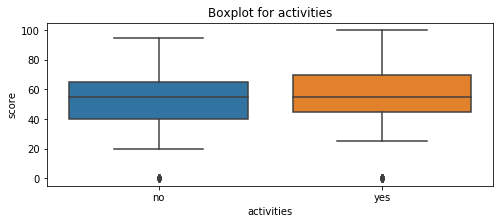

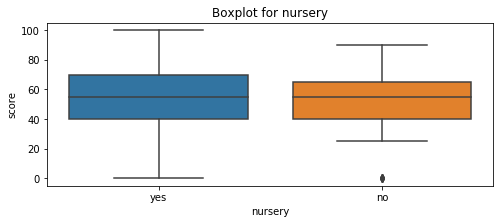

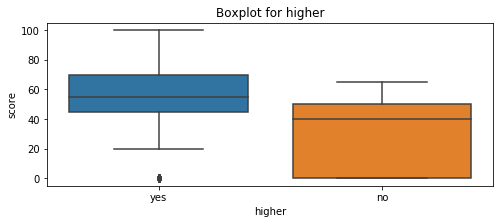

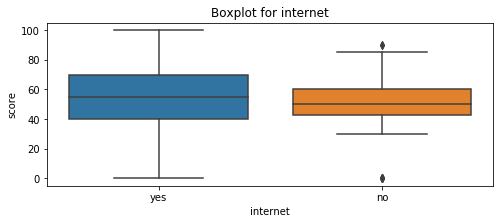

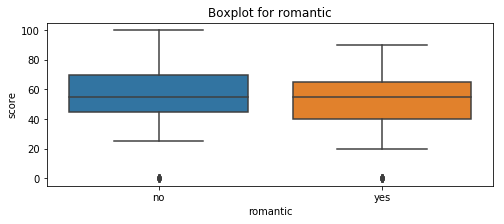

In [38]:
for col in math.select_dtypes(include='object').columns:
    fm2.get_boxplot(math, col)

### Проанализируем влияние качественных признаков на итоговый балл:
    
- **school -** хоть и средний балл обучающихся в школе GP выше, они так же показывают как очень хорошие, так и очень плохие результаты, в то время как выпускники MS показывают более стабильные результаты, хоть в среднем и ниже.
- **sex -** в среднем, мальчики сдают экзамен слегка лучше, чем девочки.
- **address -** в целом, можно отметить, что городские сдают экзамен лучше тех, ктто живет за городом.
- **famsize -** выпускники небольших семей имеют меньший разброс в баллах за тест, но высоких балов меньше, чем у детей изи больших семей.
- **Pstatus -** дети родителей, живущих раздельно, имеют меньший разброс в итоговом балле, а в среднем показывают те же результаты; получить низший балл - для них редкость.
- **Mjob -** лучшие показатели имеют дети матерей, работающих в сфере здравоохранения, а худшие, в среднем, - тех, кто не работает.
- **Fjob -** лучшие показатели имеют дети отцов, работающих учителями.
- **reason -** любопытно, что те, кто выбирал школу из-за образовательной программы, имеют в среднем худшие результаты, а те, кто указал в причине - другое, редко получают очень высокие баллы.
- **guardian -**  интересно, что дети, опекунами которых не являются ни отец, ни мать  почти никогда не получают баллов ниже 40.
- **schoolsup -** те, кто пользуется дополнительной образовательной поддержкой в целом редко получает как очень высокий, так и очень низкий балл.
- **famsup -** дети, не имеющие семейной образовательной поддержки более предсказыемы в своих результатах, редко имет низкие баллы.
- **paid -** те, кто иеет дополнительные платные занятия, показывает более стабильный результат и почти не имеет низких баллов.
- **activities -** люди с дополнительными занятиями сдают экзамен слегка лучше.
- **nursery -** те кто не ходил в детский сад, показывают более предсказуемый результат, редко получая низкие и очень высокие баллы.
- **higher -** огромная разница в итоговых баллах видна между теми, кто собирается получать высшее образование, и теми кто - нет. Вторые не стремятся получить быллы выше 70, и в основном ограничиваются баллами ниже 40.
- **internet -** те, у кого нет интернета сдают экзамен с более стабильным, но и более низким результатом, чем те, у кого он есть.
- **romantic -** те кто, состоят в романтических отношениях сдают тест немного хуже.

In [39]:
for col in math.select_dtypes(include='object').columns:
    fm2.get_stat_dif(math, col)

Найдены статистически значимые различия для колонки: Mjob


### Попробуем описать типичного человека, который сдает тест не менее, чем на 90 баллов:

In [40]:
score_g90 = math.query('score>=90')

In [41]:
score_g90.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,18.000000,18.000000,15.000000,17.000000,16.000000,16.0000,16.00000,17.000000,18.000000,18.000000,18.00000,17.000000,18.000000
mean,16.333333,3.444444,2.733333,1.294118,2.312500,0.0625,-6.93750,4.176471,3.277778,3.055556,3.00000,5.411765,91.944444
std,1.455214,0.704792,1.032796,0.587868,1.138347,0.2500,3.41504,0.808957,1.406102,0.998365,1.53393,7.053889,3.038425
min,15.000000,2.000000,1.000000,1.000000,1.000000,0.0000,-12.00000,3.000000,1.000000,2.000000,1.00000,0.000000,90.000000
25%,15.000000,3.000000,2.000000,1.000000,1.000000,0.0000,-9.00000,4.000000,2.000000,2.000000,2.00000,0.000000,90.000000
50%,16.000000,4.000000,3.000000,1.000000,2.000000,0.0000,-6.00000,4.000000,3.000000,3.000000,3.00000,4.000000,90.000000
75%,17.000000,4.000000,3.500000,1.000000,3.000000,0.0000,-3.00000,5.000000,4.750000,3.750000,4.00000,6.000000,95.000000
max,20.000000,4.000000,4.000000,3.000000,4.000000,1.0000,-3.00000,5.000000,5.000000,5.000000,5.00000,24.000000,100.000000


In [42]:
score_g90.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,18,18,18,16,15,16,14,18,18,18,18,17,18,18,18,16,17
unique,2,2,2,2,2,5,4,4,3,1,2,2,2,2,1,2,2
top,GP,M,U,GT3,T,services,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,17,11,15,11,11,7,8,7,13,18,10,10,10,17,18,14,16


In [43]:
math_description.loc['famsup', 'description']

'семейная образовательная поддержка (yes или no)'

**Описание:**
Это мальчик 16 лет, 
не испытавший неудач,
со средним здоровьем,
стрямящийся получить высшее образование,
пользующийся интернетом,
проживающий в городе,
менее чем 15 минутах от школы GP,
выбранной из-за образовательной программы,
в семье более, чем из 3 человек,
с хорошими внутрисемейными отношениями 
и совместно живущими родителями, 
который имеет свободное время
и гуляет с друзьями, но не слишком много,
и не состоит в романтических отношениях,
пропускал не более 4-6 раз занятия.
Он имеет внеучебные занятия 
и не имеет дополнительной образовательной поддержки 
и дополнительных платных занятий, 
но есть семейная образовательная поддержка.
В прошлом посещал детский сад.
Мама этого мальчика, как правило является опекуном и имеет высшее образование и работает в сфере услуг,
а отец - среднее специальное и работает в прочих сферах.




### Попробуем описать типичного человека, который сдает тест не более, чем на 30 баллов:

In [44]:
score_l30 = math.query('score<30')
score_l30.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,45.000000,44.000000,42.000000,39.000000,45.000000,43.000000,45.000000,40.000000,44.000000,44.000000,43.000000,44.000000,45.000000
mean,17.000000,2.431818,2.380952,1.410256,1.866667,0.906977,-5.600000,3.825000,3.295455,3.340909,3.604651,2.318182,4.333333
std,1.261312,1.086871,1.125153,0.677377,0.868646,1.042295,2.605937,1.034966,0.954294,1.328457,1.365206,5.505907,9.450830
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.750000,1.250000,1.000000,1.000000,0.000000,-6.000000,3.000000,3.000000,2.000000,3.000000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,0.000000,0.000000
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.500000,-3.000000,5.000000,4.000000,5.000000,5.000000,0.000000,0.000000
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,22.000000,25.000000


In [45]:
score_l30.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,45,45,44,41,41,43,38,42,43,44,43,40,43,42,44,39,42
unique,2,2,2,2,2,5,4,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,yes
freq,39,26,30,33,39,17,20,19,30,41,25,31,23,32,38,33,22


In [46]:
math_description.loc['Medu', 'description']

'образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)'

**Описание:** 
Это девочка 17 лет, 
испытавшая не более, чем одну неудачу,
с хорошим здоровьем, 
стрямящаяся получить высшее образование, 
пользующаяся интернетом, 
проживающая в городе, 
менее чем 15 минутах от школы GP,
выбранной из-за образовательной программы,
в семье более, чем из 3 человек, 
с хорошими внутрисемейными отношениями 
и совместно живущими родителями, 
которая имеет свободное время и гуляет с друзьями, но не слишком много, 
и не состоит в романтических отношениях, 
не пропускала (почти) занятия. 

Не имеет дополнительных внеучебных занятий,
не имеет дополнительной образовательной поддержки и дополнительных платных занятий, но есть семейная образовательная поддержка. В прошлом посещала детский сад. 

Мама этой девочки, как правило является опекуном и образование не выше среднего специального и работает в прочих сферах, а отец - имеет образование ниже среднего специального и работает в прочих сферах.

**Получили, что главными отличиями тех, кто сдает тест на 90+ баллов, и тех кто на 30- могут быть следующие признаки:**

- пол
- количество пропусков
- отсутствие внеучебных занятий/activities
- образование родителей
- работа родителей (матери)

In [47]:
for col in math.select_dtypes(exclude='object'):
    fm2.statistics(score_g90, score_l30, col)


 Выборочные средние по столбцу Medu не равны

 Выборочные средние по столбцу failures не равны

 Выборочные средние по столбцу score не равны


Анализ выборок показал, что значимые отличаи есть в количественных признаках: **образование матери** и **количество неудач**

# Выводы

### По обработке:

1. Столбец **studytime, granular** необходимо удалить, так как он сильно коррелирует с **studytime**
2. В столбце **Fedu** стоит удалить выброс со значением 40
3. В столбце **famrel** стоит удалить выброс со значением -1

### По анализу:

Так как задача - найти признаки, которые смогут помочь выявлять учащихся, находящихся в группе риска, то в результате анализа данных были найдены признаки, потенциально позволяющие это сделать:

1. **Пол ученика (sex):** среди тех, кто получает низкие баллы, девочки преобладают.
2. **Количество пропусков (absences)**: но кажется, что засисимость здесь обратная.
3. **Образование родителей (Medu, Fedu):** чем выше образование, тем выше оценки
4. **Количество неудач (failures):** наличие неудач пагубно влияет на итоговый балл
5. **Работа родителей (Mjob, Fjob)**